<h2> Introduction </h2>

<p>Chemotherapy is one of the most used treatment against cancer. It uses chemical substances (<a href=https://en.wikipedia.org/wiki/List_of_chemotherapeutic_agents>chemotherapeutic agents</a>) which kill cells that divide too quickly. These chemical substances are often diluted in a particular solution and packaged in bags, diffusers, or syringes, before being administered. <a href=https://books.google.fr/books?id=EB00rD8AqaYC&pg=PA188&lpg=PA188&dq=wrong+chemotherapeutic&source=bl&ots=m7EfyG6A3J&sig=ZVa0hLqDPFe2iExV6FOREJztN8c&hl=en&sa=X&ved=0ahUKEwj_5ZinkarMAhUFnBoKHaJiAgAQ6AEIKDAC#v=onepage&q=wrong%20chemotherapeutic&f=false>Wrong medication</a>  (wrong chemotherapeutic agent or wrong concentration) can have major impacts for patients. To prevent wrong medication, some recent French regulations impose the verification of anti-cancer drugs before their administration. The goal is to check that they contain the good chemotherapeutic agent with the good dosage. 

<p><a href=https://en.wikipedia.org/wiki/Raman_spectroscopy>Raman spectroscopy</a> could be used to make this check, since, theoretically, i) each molecule has a specific spectral fingerprint by which the molecule can be identified; and ii) the Raman intensity increases with the concentration of the molecule. The main advantage of spectroscopy above other methods (for example, liquid chromatography) is that it is non-destructive and non-invasive (measures are made without opening the drug containers). However, this method is rarely used in hospital environment because of the complexity of the spectral signals to analyze. Automating the analysis of these spectral signals could significantly help. Eventually, a complete analytical system (from measuring Raman spectra to identifying the chemotherapeutic agent and its concentration) could be designed, which would be easy to use and would prevent wrong medication. 

<p>In this context, the goal of this project is to develop prediction models able to <b>identify and quantify chemotherapeutic agents from their Raman spectra</b>.  

<p>The Lip(Sys)² laboratory measured Raman spectra of 4 types of chemotherapeutic agents (called <i>molecule</i>) in 3 different packages (called <i>vial</i>), diluted in 9 different solutions (called <i>solute gammes</i>), and having different concentrations. A total of <b>360 spectra were measured for each agent</b>, except for one (348 spectra).<br>  

Part of these data are saved in the file <code>train.csv</code> as follows (<code>n_samples</code> being the number of samples): 
<ul>
    <li><b>molecule</b>: Type of chemotherapeutic agent. Six possible values: A for infliximab, B for bévacizumab, Q for ramucirumab, R for rituximab. Dimension: (<code>n_samples</code>,)</li>
    <li><b>vial</b>: Vial type. Three possible values: 1, 2, 3. Dimension: (<code>1</code>, <code>n_samples</code>)</li>
    <li><b>solute</b>: Solute group. Fourteen possible values: 1, 2, ..., 14. Dimension: (<code>1</code>, <code>n_samples</code>)</li>
    <li><b>concentration</b>: Concentration of the molecule. Dimension: (<code>n_samples</code>, <code>1</code>)</li>
    <li><b>spectra</b>: Intensity of Raman spectrum. Dimension: (<code>n_samples</code>, <code>1866</code>)</li>
</ul>

<p>To sum up, there are too objectives:

<ul>
    <li><b>classification</b>: predict which molecule it corresponds to given the spectrum.</li>
    <li><b>regression</b>: predict the concentration of a molecule. The prediction should not depend on the vial or the solute group. The error metric is the mean absolute relative error (mare): $$\frac{1}{n_{samples}}\sum_{i=1}^{n_{samples}}\left|\frac{y_i-\hat{y}_i}{y_i}\right|$$ with $y$ and $\hat{y}$ being the true and predicted concentration.</li>
</ul>

## Data mining

We can read `spectra_0.csv`, `spectra_1.csv`, `spectra_2.csv`, `spectra_3.csv` which will be used to train a model of machine learning in order to predict either a concentration of molecule or a molecule type.

In [65]:
import pandas
from numpy import *

def load_csv(filename):
    s = pandas.read_csv(filename)
    c = s['concentration']
    m = s['molecule']
    s = s['spectra']
    x = []
    for spec in s:
        x.append(fromstring(spec[1:-1], sep=','))
    s=pandas.DataFrame(x)
        
    return c, m, s

stot = []
c = []
m = []
for i in range(0, 3):
    filename = "data/spectra_%i.csv" %(i)
    print(filename)
    c_tmp, m_tmp, s_tmp = load_csv(filename)
    stot.append(s_tmp)
    c.append(c_tmp)
    m.append(m_tmp)
    print(type(c))
    
stot=pandas.concat(stot)
c=pandas.concat(c)
m=pandas.concat(m)
print(type(c))
stot.head()


#print(c)
#print(m)
#print(s)
    

data/spectra_0.csv
<class 'list'>
data/spectra_1.csv
<class 'list'>
data/spectra_2.csv
<class 'list'>
<class 'pandas.core.series.Series'>


,0,1,2,3,4,5,6,7,8,9,...,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865
0,0.015296,0.015294,0.015314,0.015410,0.015515,0.015557,0.015596,0.015465,0.015412,0.015336,...,0.017235,0.017241,0.017283,0.017406,0.017257,0.016999,0.017432,0.017305,0.017071,0.017202
1,0.014363,0.014329,0.014400,0.014516,0.014411,0.014418,0.014398,0.014507,0.014256,0.014644,...,0.018721,0.018701,0.018726,0.018717,0.018678,0.018617,0.018576,0.018519,0.018610,0.018763
2,0.016303,0.016185,0.016357,0.016412,0.016421,0.016429,0.016060,0.016364,0.016401,0.016364,...,0.018101,0.017998,0.017736,0.017953,0.018016,0.017647,0.018027,0.017772,0.017903,0.017600
3,0.013583,0.013554,0.013444,0.013642,0.013708,0.013579,0.013585,0.013611,0.013499,0.013731,...,0.018503,0.018131,0.017991,0.018122,0.018349,0.018125,0.018055,0.018112,0.018152,0.017960
4,0.020811,0.020767,0.020867,0.020702,0.020887,0.020445,0.020726,0.020622,0.020779,0.020920,...,0.015134,0.015288,0.015184,0.015056,0.015228,0.015286,0.015042,0.014958,0.015062,0.014867


In [1]:
import pandas
from numpy import *

s0=pandas.read_csv('data/spectra_0.csv')
c0=s0['concentration']
m0=s0['molecule']
s0=s0['spectra']
x=[]
for spec in s0:
    x.append(fromstring(spec[1:-1], sep=','))
s0=pandas.DataFrame(x)

s1=pandas.read_csv('data/spectra_1.csv')
c1=s1['concentration']
m1=s1['molecule']
s1=s1['spectra']
x=[]
for spec in s1:
    x.append(fromstring(spec[1:-1], sep=','))
s1=pandas.DataFrame(x)

s2=pandas.read_csv('data/spectra_2.csv')
c2=s2['concentration']
m2=s2['molecule']
s2=s2['spectra']
x=[]
for spec in s2:
    x.append(fromstring(spec[1:-1], sep=','))
s2=pandas.DataFrame(x)

s3=pandas.read_csv('data/spectra_3.csv')
c3=s3['concentration']
m3=s3['molecule']
s3=s3['spectra']
x=[]
for spec in s3:
    x.append(fromstring(spec[1:-1], sep=','))
s3=pandas.DataFrame(x)

f=pandas.read_csv('data/freq.csv')

stot=pandas.concat([s0, s1, s2, s3])
c=pandas.concat([c0, c1, c2, c3])
m=pandas.concat([m0, m1, m2, m3])

In [39]:
    
s1=pandas.read_csv('data/spectra_1.csv')
c1=s1['concentration']
m1=s1['molecule']
s1=s1['spectra']
x=[]
for spec in s1:
    x.append(fromstring(spec[1:-1], sep=','))
s1=pandas.DataFrame(x)

s2=pandas.read_csv('data/spectra_2.csv')
c2=s2['concentration']
m2=s2['molecule']
s2=s2['spectra']
x=[]
for spec in s2:
    x.append(fromstring(spec[1:-1], sep=','))
s2=pandas.DataFrame(x)

s3=pandas.read_csv('data/spectra_3.csv')
c3=s3['concentration']
m3=s3['molecule']
s3=s3['spectra']
x=[]
for spec in s3:
    x.append(fromstring(spec[1:-1], sep=','))
s3=pandas.DataFrame(x)

f=pandas.read_csv('data/freq.csv')

stot=pandas.concat([s0, s1, s2, s3])
c=pandas.concat([c0, c1, c2, c3])
m=pandas.concat([m0, m1, m2, m3])

IndentationError: expected an indented block (<ipython-input-39-26175b42db46>, line 8)

In [2]:
f.head()

,freqs
0,400.095
1,402.626
2,405.155
3,407.684
4,410.212


In [3]:
c.head()

0     8000
1      500
2     2000
3     2000
4    10000
Name: concentration, dtype: int64

In [4]:
m.head()

0    Q
1    B
2    B
3    A
4    B
Name: molecule, dtype: object

In [5]:
stot.head()

,0,1,2,3,4,5,6,7,8,9,...,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865
0,0.015296,0.015294,0.015314,0.015410,0.015515,0.015557,0.015596,0.015465,0.015412,0.015336,...,0.017235,0.017241,0.017283,0.017406,0.017257,0.016999,0.017432,0.017305,0.017071,0.017202
1,0.014363,0.014329,0.014400,0.014516,0.014411,0.014418,0.014398,0.014507,0.014256,0.014644,...,0.018721,0.018701,0.018726,0.018717,0.018678,0.018617,0.018576,0.018519,0.018610,0.018763
2,0.016303,0.016185,0.016357,0.016412,0.016421,0.016429,0.016060,0.016364,0.016401,0.016364,...,0.018101,0.017998,0.017736,0.017953,0.018016,0.017647,0.018027,0.017772,0.017903,0.017600
3,0.013583,0.013554,0.013444,0.013642,0.013708,0.013579,0.013585,0.013611,0.013499,0.013731,...,0.018503,0.018131,0.017991,0.018122,0.018349,0.018125,0.018055,0.018112,0.018152,0.017960
4,0.020811,0.020767,0.020867,0.020702,0.020887,0.020445,0.020726,0.020622,0.020779,0.020920,...,0.015134,0.015288,0.015184,0.015056,0.015228,0.015286,0.015042,0.014958,0.015062,0.014867


/home/jiang/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


(<matplotlib.figure.Figure at 0x7f748b6dd320>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7490bdad30>)

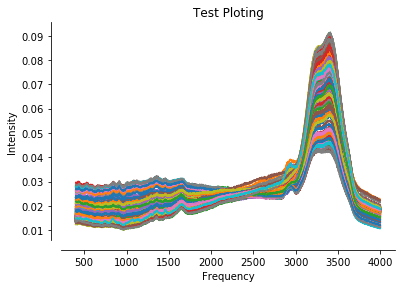

In [72]:
from matplotlib import pyplot
# this function automatically show the images in notebook
%matplotlib inline 

def plot_frequency(f, stot):
    Fig, ax = pyplot.subplots()
    ax.plot(f, stot.T)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Intensity')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward',10))
    ax.spines['bottom'].set_position(('outward',10))
    ax.set_title('Test Ploting')
    Fig.show()
    return Fig, ax

plot_frequency(f, stot)

In [5]:
import numpy
numpy.unique(m)

array(['A', 'B', 'Q', 'R'], dtype=object)

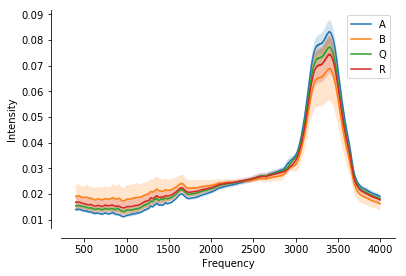

In [6]:
fig, ax = pyplot.subplots()
for m_type in numpy.unique(m):
    i = numpy.nonzero(m==m_type)[0]
    ax.plot(f,numpy.mean(stot.iloc[i],axis=0),label=m_type)
    ax.fill_between(numpy.ravel(f),numpy.mean(stot.iloc[i],axis=0)+numpy.std(stot.iloc[i],axis=0),numpy.mean(stot.iloc[i],axis=0)-numpy.std(stot.iloc[i],axis=0),alpha=0.2)

ax.set_xlabel('Frequency')
ax.set_ylabel('Intensity')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))

In [9]:
numpy.unique(c)

array([  300,   400,   500,   600,   800,  1000,  1200,  1400,  1500,
        1600,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000, 20000, 25000])

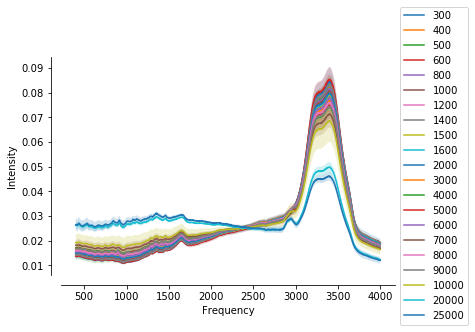

In [13]:
fig, ax = pyplot.subplots()
for c_type in numpy.unique(c):
    i = numpy.nonzero(c == c_type)[0]
    ax.plot(f, numpy.mean(stot.iloc[i], axis=0), label=c_type)
    ax.fill_between(numpy.ravel(f), numpy.mean(stot.iloc[i], axis=0) + numpy.std(stot.iloc[i], axis=0), numpy.mean(stot.iloc[i], axis=0) - numpy.std(stot.iloc[i], axis=0), alpha=0.2)

ax.set_xlabel('Frequency')
ax.set_ylabel('Intensity')
ax.legend(loc='center left', bbox_to_anchor = (1,0.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

We are going to use `spectra_4.csv` for testing a model learned on the previous data

In [14]:
s4 = pandas.read_csv('data/spectra_4.csv')

f = pandas.read_csv('data/freq.csv')

c4 = s4['concentration']
m4 = s4['molecule']
s4 = s4['spectra']

In [15]:
x = []
for spec in s4:
    x.append(numpy.fromstring(spec[1:-1], sep=','))
    
s4 = pandas.DataFrame(x)

s4.head()

,0,1,2,3,4,5,6,7,8,9,...,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865
0,0.023701,0.023571,0.023244,0.023536,0.023634,0.023371,0.023423,0.023348,0.023569,0.023189,...,0.015005,0.015258,0.014981,0.014987,0.014924,0.014803,0.015095,0.014768,0.014922,0.014848
1,0.013789,0.013528,0.013648,0.013589,0.013526,0.013707,0.013397,0.013680,0.013548,0.013673,...,0.018526,0.018771,0.018903,0.018520,0.018579,0.018642,0.018676,0.018699,0.018576,0.018567
2,0.014350,0.014415,0.014295,0.014446,0.014379,0.014427,0.014240,0.014451,0.014170,0.014463,...,0.018997,0.019242,0.019238,0.018997,0.018954,0.019171,0.019123,0.019204,0.019111,0.018844
3,0.013796,0.013415,0.013640,0.013332,0.013536,0.013525,0.013534,0.013376,0.013690,0.013631,...,0.018467,0.018868,0.018775,0.018556,0.018359,0.018654,0.018507,0.018336,0.018433,0.018598
4,0.014476,0.014386,0.014636,0.014484,0.014654,0.014414,0.014729,0.014396,0.014381,0.014636,...,0.019359,0.019328,0.019158,0.018993,0.019506,0.018934,0.019191,0.019212,0.018941,0.019093


AttributeError: 'Series' object has no attribute 'find'

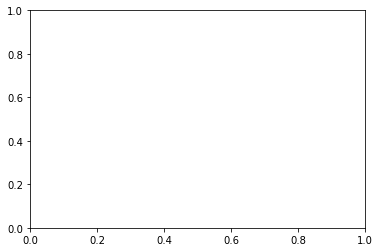

In [10]:
fig, ax = pyplot.subplots()
ax.plot(f, s4.T)
ax.set_xlabel('Frequency')
ax.set_ylabel('Intensity')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

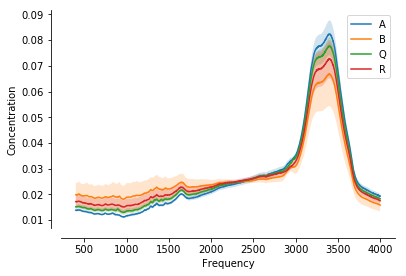

In [14]:
fig, ax = pyplot.subplots()
for m_type in numpy.unique(m4):
    i = numpy.nonzero(m4 == m_type)[0]
    ax.plot(f, numpy.mean(s4.iloc[i], axis=0), label=m_type)
    ax.fill_between(numpy.ravel(f), numpy.mean(s4.iloc[i], axis=0) + numpy.std(s4.iloc[i], axis=0), numpy.mean(s4.iloc[i], axis=0) - numpy.std(s4.iloc[i], axis=0), alpha=0.2)

ax.set_xlabel('Frequency')
ax.set_ylabel('Intensity')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

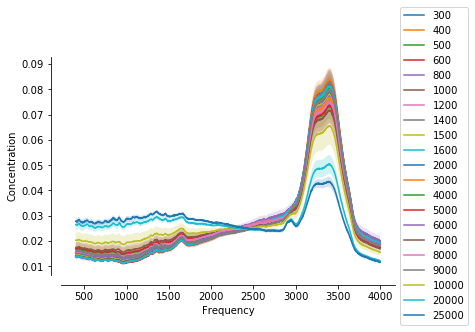

In [15]:
fig, ax = pyplot.subplots()
for c_type in numpy.unique(c4):
    i = numpy.nonzero(c4 == c_type)[0]
    ax.plot(f, numpy.mean(s4.iloc[i], axis=0), label=c_type)
    ax.fill_between(numpy.ravel(f), numpy.mean(s4.iloc[i], axis=0) + numpy.std(s4.iloc[i], axis=0), numpy.mean(s4.iloc[i], axis=0) - numpy.std(s4.iloc[i], axis=0), alpha=0.2)

ax.set_xlabel('Frequency')
ax.set_ylabel('Intensity')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

## Training and testing a machine learning model for classification

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

p = make_pipeline(StandardScaler(), PCA(n_components=100, random_state=0), RandomForestClassifier(random_state=0))
p.fit(stot, m)

print('Accuracy score: {0:.2f}'.format(p.score(s4, m4)))

Accuracy score: 0.83


[[41  3  1  0]
 [ 7 42  0  8]
 [ 3  1 44  0]
 [ 4  5  0 31]]


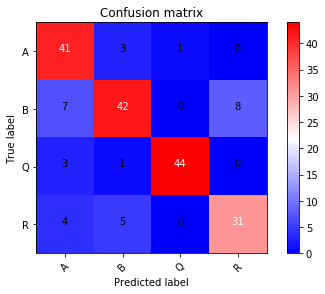

In [18]:
from sklearn.metrics import confusion_matrix
import itertools

pr = p.predict(s4)
cm = confusion_matrix(m4, pr)

print(cm)

pyplot.imshow(cm, interpolation='nearest', cmap='bwr')
pyplot.title('Confusion matrix')
pyplot.colorbar()
tick_marks = numpy.arange(len(numpy.unique(m4)))
pyplot.xticks(tick_marks, numpy.unique(m4), rotation=45)
pyplot.yticks(tick_marks, numpy.unique(m4))

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    pyplot.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

pyplot.tight_layout()
pyplot.ylabel('True label')
pyplot.xlabel('Predicted label')

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

p = make_pipeline(StandardScaler(), PCA(n_components=100, random_state=0), LinearSVC(random_state=0))
p.fit(stot, m)

print('Accuracy score: {0:.2f}'.format(p.score(s4, m4)))

Accuracy score: 0.93


[[45  0  0  0]
 [ 1 48  2  6]
 [ 2  0 46  0]
 [ 2  0  1 37]]


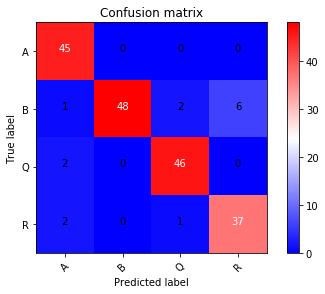

In [25]:
from sklearn.metrics import confusion_matrix
import itertools

pr = p.predict(s4)
cm = confusion_matrix(m4, pr)

print(cm)

pyplot.imshow(cm, interpolation='nearest', cmap='bwr')
pyplot.title('Confusion matrix')
pyplot.colorbar()
tick_marks = numpy.arange(len(numpy.unique(m4)))
pyplot.xticks(tick_marks, numpy.unique(m4), rotation=45)
pyplot.yticks(tick_marks, numpy.unique(m4))

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    pyplot.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

pyplot.tight_layout()
pyplot.ylabel('True label')
pyplot.xlabel('Predicted label')

## Training and testing a machine learning model for regression

In [26]:
med_stot = numpy.median(stot, axis=0)
p_25_stot = numpy.percentile(stot,25,axis=0)
p_75_stot = numpy.percentile(stot,75,axis=0)
stot = (stot-med_stot)/(p_75_stot-p_25_stot)
s4 = (s4-med_stot)/(p_75_stot-p_25_stot)

In [27]:
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline

p = make_pipeline(PCA(n_components=100), RidgeCV())
p.fit(stot, c)

print('R2 score: {0:.2f}'.format(p.score(s4, c4)))

R2 score: 0.96


(0, 25000)

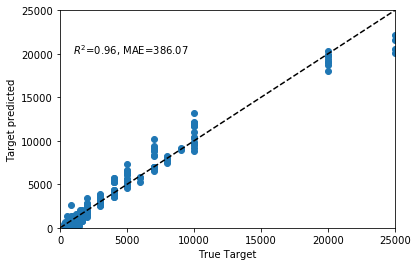

In [22]:
from sklearn.metrics import r2_score, median_absolute_error
y_pred = p.predict(s4)

fig, ax = pyplot.subplots()
ax.scatter(c4, y_pred)
ax.plot([0, 25000], [0, 25000], '--k')
ax.set_ylabel('Target predicted')
ax.set_xlabel('True Target')
ax.text(1000, 20000, r'$R^2$=%.2f, MAE=%.2f' % (r2_score(c4, y_pred), median_absolute_error(c4, y_pred)))
ax.set_xlim([0, 25000])
ax.set_ylim([0, 25000])

In [30]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

p = make_pipeline(PCA(n_components=100, random_state=0), RandomForestRegressor(random_state=0))
p.fit(stot, c)

print('R2 score: {0:.2f}'.format(p.score(s4, c4)))

R2 score: 0.96


(0, 25000)

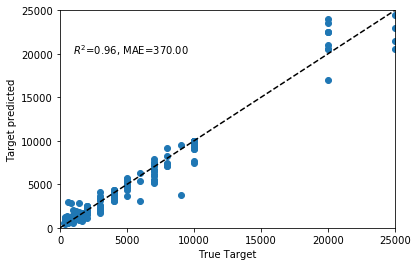

In [31]:
from sklearn.metrics import r2_score, median_absolute_error
y_pred = p.predict(s4)

fig, ax = pyplot.subplots()
ax.scatter(c4, y_pred)
ax.plot([0, 25000], [0, 25000], '--k')
ax.set_ylabel('Target predicted')
ax.set_xlabel('True Target')
ax.text(1000, 20000, r'$R^2$=%.2f, MAE=%.2f' % (r2_score(c4, y_pred), median_absolute_error(c4, y_pred)))
ax.set_xlim([0, 25000])
ax.set_ylim([0, 25000])